# Errata

  1. 3차시 실습 동영상에서 bios는 bias의 오타입니다.

#크로스 엔트로피#

동전을 100번 던져서 51번이 앞면, 49번이 뒷면이 나왔다고 가정합니다.  
앞면과 뒷면이 나올 확률을 각각 (0.5, 0.5)라고 가정했을 때 Likelyhood는 얼마인가요?  

$
\text{Likelyhood} =
\prod q_i^{N_i}
= q_1^{51}q_2^{49}=0.5^{51}\cdot0.5^{49}
$


In [1]:
print(0.5 ** 51 * 0.5 ** 49)

7.888609052210118e-31


이 경우 실제 확률 $p_1=51/100, p_2=49/100$ 이라고 하면,  
교차 엔트로피(Cross Entropy)는 얼마입니까?  

$
H = -\sum p_i\log q_i = -0.51\log0.5-0.49\log0.5
$

In [2]:
import numpy as np

print(-0.51 * np.log(0.5) - 0.49 * np.log(0.5))

0.6931471805599453


앞면과 뒷면이 나올 확률을 $q_1 = 0.51, q_2 = 0.49$ 로 가정했을 때 Likelyhood는 얼마인가요?   
  
$
q_1^{51}q_2^{49}=0.51^{51}\cdot0.49^{49}
$

In [1]:
print(0.51 ** 51 * 0.49 ** 49)

8.047980258362417e-31


이 경우 교차 엔트로피는 얼마입니까?  

$
H = -\sum p_i\log q_i = -0.51\log0.51-0.49\log0.49
$

In [2]:
import numpy as np

print(-0.51 * np.log(0.51) - 0.49 * np.log(0.49))

0.6929471672244782


두 경우에 대해 mse (평균 제곱오차)를 계산해 봅시다.  

$
\text{mse} = {1\over N}\sum\left(\hat{y}-y\right)^2
= {1\over 2} \sum\left(q_i-p_i\right)^2
$

In [3]:
print(((0.5 - 0.51) ** 2 + (0.5 - 0.49) ** 2) / 2)
print(((0.51 - 0.51) ** 2 + (0.49 - 0.49) ** 2) / 2)

0.00010000000000000018
0.0


cross entropy와 mse의 차이를 비교해봅시다.  


In [6]:
print('cross entropy difference = ',
      -0.51 * np.log(0.5) - 0.49 * np.log(0.5) - (-0.51 * np.log(0.51) - 0.49 * np.log(0.49)))
print('mse difference = ',
      ((0.51 - 0.5) ** 2 + (0.49 - 0.5) ** 2) / 2 - ((0.51 - 0.51) ** 2 + (0.49 - 0.49) ** 2) / 2)

cross entropy difference =  0.00020001333546704192
mse difference =  0.00010000000000000018


참 값이 $p_1 = 1, p_2 = 0$ 입니다.  
예측값이 $q_1 = 0.9, q_2 = 0.1$ 인 경우와, $q_1 = 1, q_2=0$ 인 경우의 각각에 대해  
cross entropy의 차이와 mse의 차이를 비교해봅시다.

In [7]:
def cross_entropy(p, q):
    p2 = p[p != 0]  # p_i가 0일 경우에는 log(0)계산을 피하기 위해 제거하고 계산함.
    q2 = q[p != 0]
    return (-p2 * np.log(q2)).sum()


def mse(p, q):
    return ((p - q) ** 2).sum() / len(p)


p = np.array([1., 0.])
q = np.array([0.9, 0.1])

h_a = cross_entropy(p, q)
h_b = cross_entropy(p, p)
print('cross entropy difference = ', h_a - h_b)
l_a = mse(p, q)
l_b = mse(p, p)
print('mse difference = ', l_a - l_b)

cross entropy difference =  0.10536051565782628
mse difference =  0.009999999999999998


cross entropy와 mse의 손실함수 비교

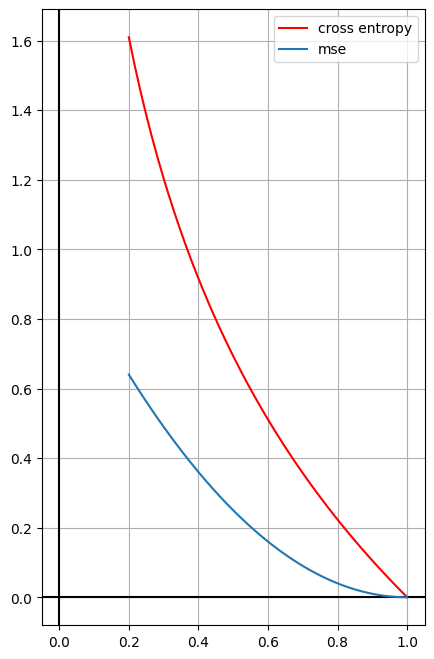

In [10]:
from matplotlib import pyplot as plt

q1 = np.linspace(0.2, 1, 50)
q2 = 1 - q1
q = np.vstack((q1.flatten(), q2.flatten())).T
h = [cross_entropy(p, q[i]) for i in range(0, 50)]
l = [mse(p, q[i]) for i in range(0, 50)]

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.plot(q1, h, label='cross entropy', color='red')
ax.plot(q1, l, label='mse')
ax.legend()
plt.show()

**연습 과제**  
1. 실제 출현 확률 $p_i$가 1/2, 1/4, 1/8, 1/16, 1/16인 5종류 데이터의 엔트로피를  계산하십시오.
2. 위와 같은 출현 확률을 같는 5종을 표현할 수 있는 이진 데이터를 만들어 보십시오.  
3. 각 종류의 비트 수가 $-\log_2p_i$와 같아졌나요?  
4. 128번 출현했다고 할때 각 종류의 평균 출현 수는 얼마입니까?  
   $N_i = Np_i$
5. 5종의 예측 출현 확률 $q_i$를 1/5, 1/5, 1/5, 1/5, 1/5라고 할 때  
   Likelyhood는 얼마입니까?  
   $\text{Likelyhood} = \prod q_i^{N_i}=\prod q_i^{Np_i}$  
6. 교차 엔트로피를 계산하십시오.  
   $H = -\sum p_i\log q_i$  
7. 5종의 예측 출현 확률 $q_i$를 $p_i$와 같은 1/2, 1/4, 1/8, 1/16, 1/16 이라고 할 때  
   가능도와 교차 엔트로피를 계산하십시오.  
8. 계산 하기 전에 어느 쪽이 크거나 작은지 예측해 봅시다.

# CNN을 이용한 MNIST 인식

In [11]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
NUM_CLASSES = 10

In [12]:
from tensorflow.keras.utils import to_categorical

# cnn을 위한 전처리 (channel을 위한 shape 추가)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train / 255.
x_test = x_test / 255.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print("converted x.shape = ", x_train.shape)

converted x.shape =  (60000, 28, 28, 1)


In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

**학습 전 컨볼루션 커널**

In [18]:
conv2d_1 = model.layers[0]
weights = conv2d_1.get_weights()
w = weights[0]
b = weights[1]
print(w.shape, b.shape)
filter_id = 0
kernel = w[:, :, :, filter_id:filter_id + 1]
kernel = kernel.reshape(3, 3)
print(kernel)

(3, 3, 1, 32) (32,)
[[-0.03781766  0.04994632 -0.08508295]
 [ 0.11840875  0.0467688  -0.09008784]
 [ 0.11628617 -0.00244486  0.01895   ]]


**모델 학습**

In [19]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.5924 - accuracy: 0.8120
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1329 - accuracy: 0.9598
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0921 - accuracy: 0.9721
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0735 - accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0616 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0536 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9852
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0428 - accuracy: 0.9872
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0397 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.03

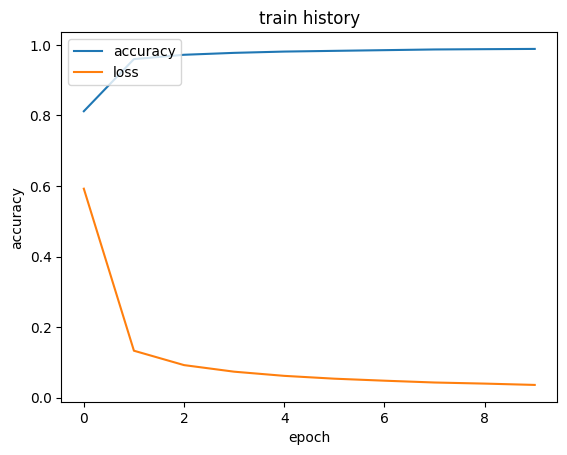

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('train history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

**테스트 셋 결과 확인**

In [21]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0442 - accuracy: 0.9863


**softmax 결과 학인**


In [22]:
preds = model.predict(x_train[0:1])
print(preds[0])
print(preds[0].sum())

1/1 [==============================] - 0s 309ms/step
[1.7568082e-08 9.0489714e-08 5.4897948e-09 1.6528724e-01 1.1562650e-10
 8.3467698e-01 2.3903734e-08 1.0144908e-07 2.7072107e-05 8.4191870e-06]
0.99999994


**Fully Connected Network과의 비교**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6412 - accuracy: 0.8378
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3343 - accuracy: 0.9078
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2851 - accuracy: 0.9203
Epoch 

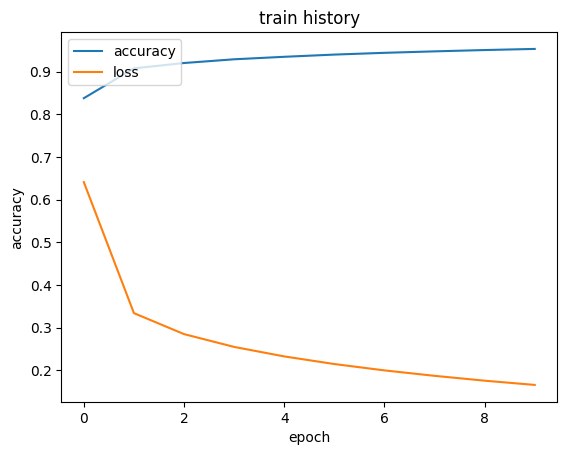

313/313 [==============================] - 1s 2ms/step - loss: 0.1672 - accuracy: 0.9515


In [23]:
modelfc = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelfc.summary()

modelfc.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = modelfc.fit(x_train, y_train, epochs=10)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('train history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

loss, accuracy = modelfc.evaluate(x_test, y_test)

**모델의 레이어 출력값 확인**

모델로 부터 각 레이어의 값을 출력하는 fuctors생성

out[0].shape = (2, 26, 26, 32)
model result shape (with channel) =  (26, 26, 1)
(26, 26)


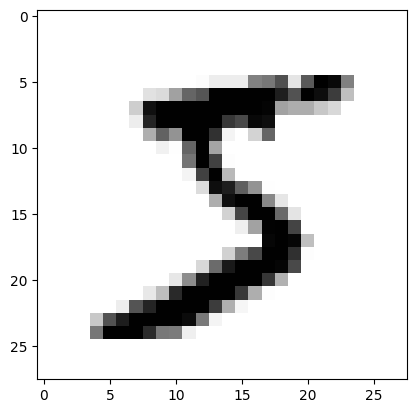

[[0.         0.         0.01176471]
 [0.36862745 0.60392157 0.66666667]
 [0.99215686 0.99215686 0.99215686]]


In [24]:
from tensorflow.keras import backend as K

inp = model.input  # input placeholder
outputs = [layer.output for layer in model.layers]  # all layer outputs
functors = [K.function([inp, keras.Input(shape=())], [out]) for out in
            outputs]  # evaluation functions

layer_id = 0
filter_id = 0
layerfn = functors[layer_id]
learning_phase = 0  # 학습시 1, 추론시 0
out = layerfn([x_train[0:2], learning_phase])  # 첫 이미지 두개만 추론
# out[출력 parameter 순서][데이터 id][height, width, channel]
print('out[0].shape =', out[0].shape)
result = out[0][0][:, :, filter_id:filter_id + 1]
# 채널결과가 포함되어 있다.
print('model result shape (with channel) = ', result.shape)
# 간편한 형식을 위해서 채널 dimension을 삭제
result_as_img = result.reshape((result.shape[0], result.shape[1]))
print(result_as_img.shape)

# 첫번째 입력 이미지 확인
plt.imshow(x_train[0].reshape((28, 28)), cmap=plt.cm.binary)
plt.show()
x_pos = 10
y_pos = 5
img3x3 = x_train[0][y_pos:y_pos + 3, x_pos:x_pos + 3, :].reshape((3, 3))
print(img3x3)


**학습 후 커널 확인**

In [25]:
conv2d_1 = model.layers[0]
weights = conv2d_1.get_weights()
w = weights[0]
b = weights[1]
print(w.shape, b.shape)
filter_id = 0
kernel = w[:, :, :, filter_id:filter_id + 1]
kernel = kernel.reshape(3, 3)
print(kernel)
bias = b[0]
print(bias)
print(img3x3)

(3, 3, 1, 32) (32,)
[[ 0.10242567  0.08980638 -0.21852088]
 [ 0.3180238   0.18644422 -0.09168968]
 [ 0.3351708   0.20341481  0.14867398]]
-0.00059590355
[[0.         0.         0.01176471]
 [0.36862745 0.60392157 0.66666667]
 [0.99215686 0.99215686 0.99215686]]


In [26]:
y = (kernel * img3x3).sum() + bias
if y < 0:  # activation = ReLU
    y = 0
print(y)
print(result[y_pos][x_pos])

0.8474061307024815
[0.8474061]


**연습과제**  
1. MNIST CNN인식에서 이미지와 결과를 표시하는 것을 다시 한번 연습합시다.  
2. CNN에서 epoch을 증가시켜 가면서 인식률이 최대 치가 되는 지점을 찾아봅시다.  
3. epoch에 따른 test set의 손실과 인식률도 같이 확인해 봅시다.  
4. 손실함수를 교차 엔트로피 대신에 mse를 사용하고 epoch에 따른 인식률의 변화를 실험해 봅시다.  
   (교차 엔트로피 쪽이 더 빨리 인식률이 좋아졌습니까? 그 이유는 무엇입니까?)  

